In [2]:
# Load libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler  # standarization
from sklearn.model_selection import train_test_split # Data split
from sklearn.model_selection import KFold # Folding
from sklearn.model_selection import cross_val_score  #validation
from sklearn.model_selection import GridSearchCV # Parameter Tunning
from sklearn.metrics import classification_report # Report
from sklearn.metrics import confusion_matrix # matrix
from sklearn.metrics import accuracy_score # Accuracy
from sklearn.pipeline import Pipeline # pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC  # Non linear Algorithme
from sklearn.ensemble import AdaBoostClassifier # Boosting Algorithme
from sklearn.ensemble import GradientBoostingClassifier # Boosting Algorithme
from sklearn.ensemble import RandomForestClassifier # Bagging Algorithme
from sklearn.ensemble import ExtraTreesClassifier # Bagging Algorithme

In [34]:
names = ['radar_s1', 'radar_s2', 'radar_paired_s1', 'radar_paired_s2', 'radar_paired_s3', 'radar_paired_s4', 'radar_paired_s5', 'radar_paired_s6', 'radar_paired_s7', 'radar_paired_s8', 'radar_paired_s9', 'radar_paired_s10', 'radar_paired_s11', 'radar_paired_s12', 'radar_paired_s13', 'radar_paired_s14', 'radar_paired_s15', 'radar_paired_s16', 'radar_paired_s17', 'radar_paired_s18', 'radar_paired_s19', 'radar_paired_s20', 'radar_paired_s21', 'radar_paired_s22', 'radar_paired_s23', 'radar_paired_s24', 'radar_paired_s25', 'radar_paired_s26', 'radar_paired_s27', 'radar_paired_s28', 'radar_paired_s29', 'radar_paired_s30', 'radar_paired_s31',  'class']
df=pd.read_csv('https://raw.githubusercontent.com/Afnan00-1/Binary-Classification-problem/main/ionosphere.csv',names=names)

In [35]:
pd.set_option('display.max_columns', 500)
df.head()

,radar_s1,radar_s2,radar_paired_s1,radar_paired_s2,radar_paired_s3,radar_paired_s4,radar_paired_s5,radar_paired_s6,radar_paired_s7,radar_paired_s8,radar_paired_s9,radar_paired_s10,radar_paired_s11,radar_paired_s12,radar_paired_s13,radar_paired_s14,radar_paired_s15,radar_paired_s16,radar_paired_s17,radar_paired_s18,radar_paired_s19,radar_paired_s20,radar_paired_s21,radar_paired_s22,radar_paired_s23,radar_paired_s24,radar_paired_s25,radar_paired_s26,radar_paired_s27,radar_paired_s28,radar_paired_s29,radar_paired_s30,radar_paired_s31,class
1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [14]:
df.shape

(351, 34)

In [15]:
df.columns

Index(['radar_s1', 'radar_s2', 'radar_paired_s1', 'radar_paired_s2',
       'radar_paired_s3', 'radar_paired_s4', 'radar_paired_s5',
       'radar_paired_s6', 'radar_paired_s7', 'radar_paired_s8',
       'radar_paired_s9', 'radar_paired_s10', 'radar_paired_s11',
       'radar_paired_s12', 'radar_paired_s13', 'radar_paired_s14',
       'radar_paired_s15', 'radar_paired_s16', 'radar_paired_s17',
       'radar_paired_s18', 'radar_paired_s19', 'radar_paired_s20',
       'radar_paired_s21', 'radar_paired_s22', 'radar_paired_s23',
       'radar_paired_s24', 'radar_paired_s25', 'radar_paired_s26',
       'radar_paired_s27', 'radar_paired_s28', 'radar_paired_s29',
       'radar_paired_s30', 'radar_paired_s31', 'class'],
      dtype='object')

In [16]:
df.describe()

,radar_s1,radar_s2,radar_paired_s1,radar_paired_s2,radar_paired_s3,radar_paired_s4,radar_paired_s5,radar_paired_s6,radar_paired_s7,radar_paired_s8,radar_paired_s9,radar_paired_s10,radar_paired_s11,radar_paired_s12,radar_paired_s13,radar_paired_s14,radar_paired_s15,radar_paired_s16,radar_paired_s17,radar_paired_s18,radar_paired_s19,radar_paired_s20,radar_paired_s21,radar_paired_s22,radar_paired_s23,radar_paired_s24,radar_paired_s25,radar_paired_s26,radar_paired_s27,radar_paired_s28,radar_paired_s29,radar_paired_s30,radar_paired_s31
count,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df['class'].value_counts()

class
g    225
b    126
Name: count, dtype: int64

In [19]:
import seaborn as sns

<Axes: >

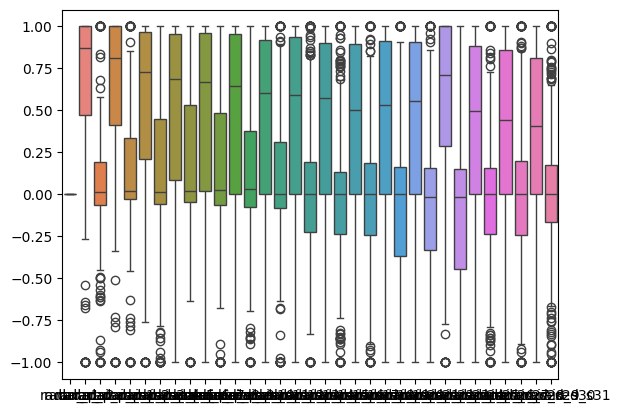

In [20]:
sns.boxplot(df)

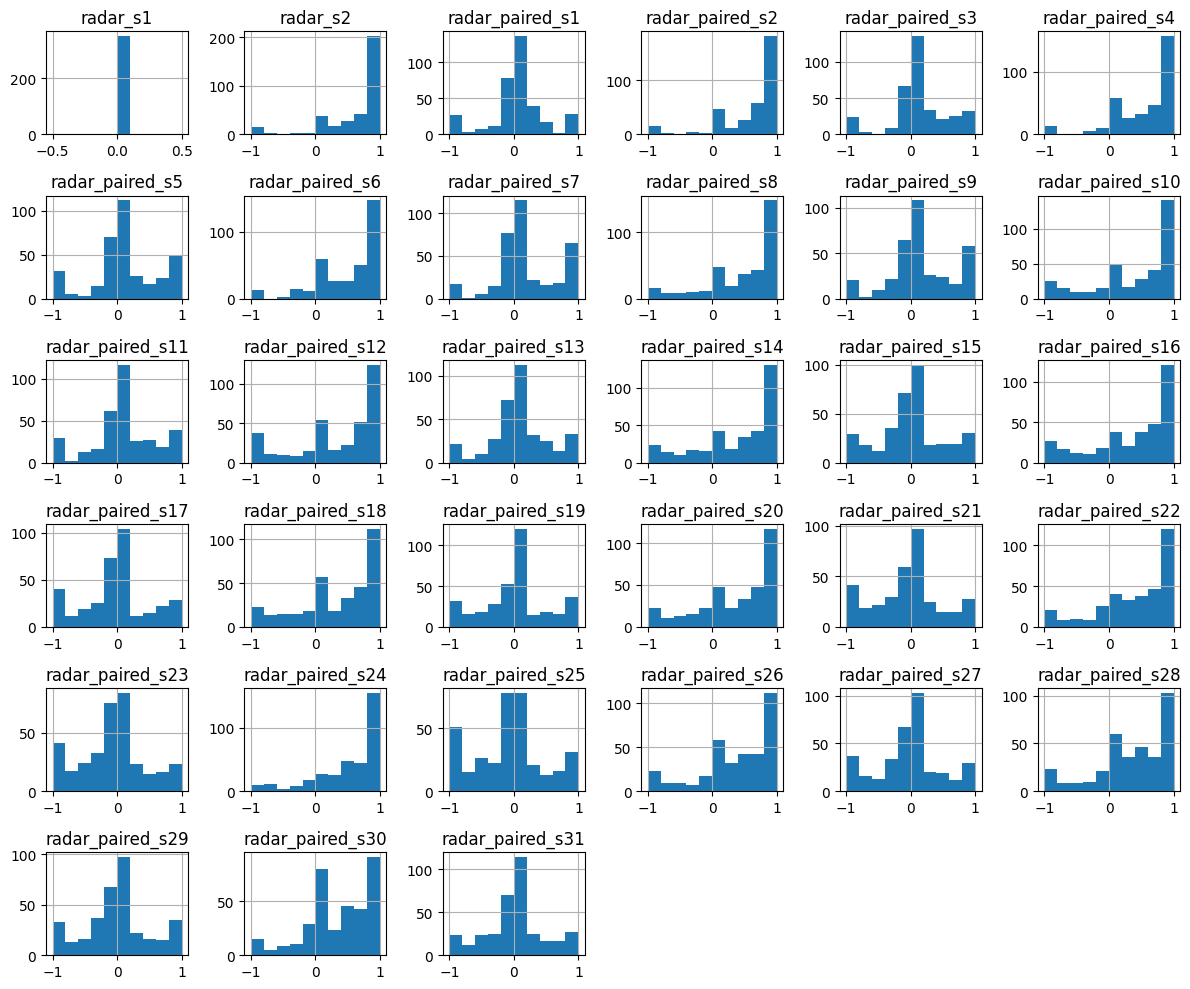

In [21]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [36]:
df['class'].value_counts()

class
g    225
b    126
Name: count, dtype: int64

In [37]:
x={'g':1,'b':0}
df['class']=df['class'].replace(x)

In [38]:
df['class'].value_counts()

class
1    225
0    126
Name: count, dtype: int64

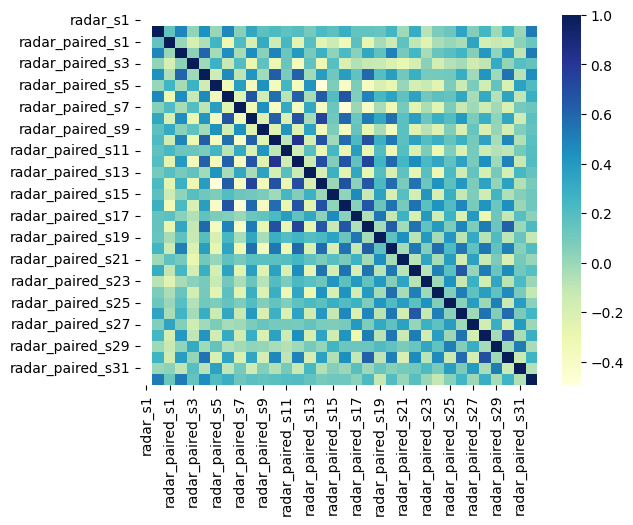

<Figure size 3000x2000 with 0 Axes>

In [44]:
df.corr()

# plotting correlation heatmap
dataplot =sns.heatmap(df.corr(), cmap="YlGnBu")
plt.figure(figsize=(30,20))
# displaying heatmap
plt.show()

In [45]:
df.corr()

,radar_s1,radar_s2,radar_paired_s1,radar_paired_s2,radar_paired_s3,radar_paired_s4,radar_paired_s5,radar_paired_s6,radar_paired_s7,radar_paired_s8,radar_paired_s9,radar_paired_s10,radar_paired_s11,radar_paired_s12,radar_paired_s13,radar_paired_s14,radar_paired_s15,radar_paired_s16,radar_paired_s17,radar_paired_s18,radar_paired_s19,radar_paired_s20,radar_paired_s21,radar_paired_s22,radar_paired_s23,radar_paired_s24,radar_paired_s25,radar_paired_s26,radar_paired_s27,radar_paired_s28,radar_paired_s29,radar_paired_s30,radar_paired_s31,class
radar_s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radar_s2,NaN,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,0.325016,0.169981,0.217597,0.164550,0.198306,0.094301,0.221446,0.172002,0.285280,0.150800,0.149374,0.138065,0.250832,-0.012570,0.304898,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584,0.519145
radar_paired_s1,NaN,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,-0.190090,0.315877,-0.149216,0.236604,-0.253150,0.185872,-0.251143,-0.147451,-0.332213,0.167244,-0.281084,-0.035401,-0.143719,0.164196,-0.104632,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608,0.125884
radar_paired_s2,NaN,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,0.449829,0.042896,0.482118,0.127217,0.398878,0.087992,0.277932,0.027588,0.221532,0.041959,0.326223,0.163663,0.502878,0.098274,0.243063,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478,0.516477
radar_paired_s3,NaN,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,-0.291447,0.163933,-0.307197,0.135206,-0.359342,0.157740,-0.316705,0.188073,-0.208571,-0.061261,-0.114966,-0.132422,-0.215778,-0.286541,-0.177576,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215,0.149099
radar_paired_s4,NaN,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,0.412876,-0.020395,0.631060,0.083657,0.615407,-0.021493,0.379737,0.115927,0.372572,0.158917,0.586627,0.190805,0.373186,0.112717,0.286749,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460,0.450429
radar_paired_s5,NaN,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,-0.364003,0.429146,-0.355875,0.253740,-0.352216,0.419673,-0.491863,0.068717,-0.400523,0.077624,-0.370473,-0.212007,-0.270624,0.007045,-0.179928,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610,0.207544
radar_paired_s6,NaN,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,0.670813,-0.167705,0.562072,-0.088988,0.618461,-0.032689,0.633574,0.200786,0.673490,0.067314,0.492411,0.237322,0.352218,0.161258,0.356564,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597,0.294852
radar_paired_s7,NaN,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,-0.337374,0.441505,-0.406358,0.323813,-0.374908,0.334135,-0.392047,0.130752,-0.471665,-0.001418,-0.404818,-0.040414,-0.318463,0.101850,-0.254785,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104,0.120634
radar_paired_s8,NaN,0.325016,-0.190090,0.449829,-0.291447,0.412876,-0.364003,0.670813,-0.337374,1.000000,-0.217968,0.619217,-0.216747,0.664243,-0.031705,0.748290,0.107085,0.590598,0.128132,0.518041,0.325267,0.561689,0.172768,0.365821,0.131849,0.292281,0.197369,0.396851,0.074600,0.294646,0.023922,0.339506,-0.152225,0.167908


In [46]:
df.isna().sum()

radar_s1            0
radar_s2            0
radar_paired_s1     0
radar_paired_s2     0
radar_paired_s3     0
radar_paired_s4     0
radar_paired_s5     0
radar_paired_s6     0
radar_paired_s7     0
radar_paired_s8     0
radar_paired_s9     0
radar_paired_s10    0
radar_paired_s11    0
radar_paired_s12    0
radar_paired_s13    0
radar_paired_s14    0
radar_paired_s15    0
radar_paired_s16    0
radar_paired_s17    0
radar_paired_s18    0
radar_paired_s19    0
radar_paired_s20    0
radar_paired_s21    0
radar_paired_s22    0
radar_paired_s23    0
radar_paired_s24    0
radar_paired_s25    0
radar_paired_s26    0
radar_paired_s27    0
radar_paired_s28    0
radar_paired_s29    0
radar_paired_s30    0
radar_paired_s31    0
class               0
dtype: int64

## Validation Test

In [64]:
# Split-out validation dataset
array = df.values
X = array[:,0:33]
Y = array[:,33]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size)

In [57]:
df.columns

Index(['radar_s1', 'radar_s2', 'radar_paired_s1', 'radar_paired_s2',
       'radar_paired_s3', 'radar_paired_s4', 'radar_paired_s5',
       'radar_paired_s6', 'radar_paired_s7', 'radar_paired_s8',
       'radar_paired_s9', 'radar_paired_s10', 'radar_paired_s11',
       'radar_paired_s12', 'radar_paired_s13', 'radar_paired_s14',
       'radar_paired_s15', 'radar_paired_s16', 'radar_paired_s17',
       'radar_paired_s18', 'radar_paired_s19', 'radar_paired_s20',
       'radar_paired_s21', 'radar_paired_s22', 'radar_paired_s23',
       'radar_paired_s24', 'radar_paired_s25', 'radar_paired_s26',
       'radar_paired_s27', 'radar_paired_s28', 'radar_paired_s29',
       'radar_paired_s30', 'radar_paired_s31', 'class'],
      dtype='object')

In [65]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

In [66]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [68]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.835714 (0.076931)
LDA: 0.853571 (0.062780)
KNN: 0.832143 (0.089000)
CART: 0.867857 (0.032143)
NB: 0.821429 (0.067763)
SVM: 0.935714 (0.057143)


## Kfold Validation test

LR: 0.829286 (0.079054)
LDA: 0.829524 (0.108459)
KNN: 0.835079 (0.109670)
CART: 0.868968 (0.064083)
NB: 0.786190 (0.104988)
SVM: 0.940238 (0.036985)


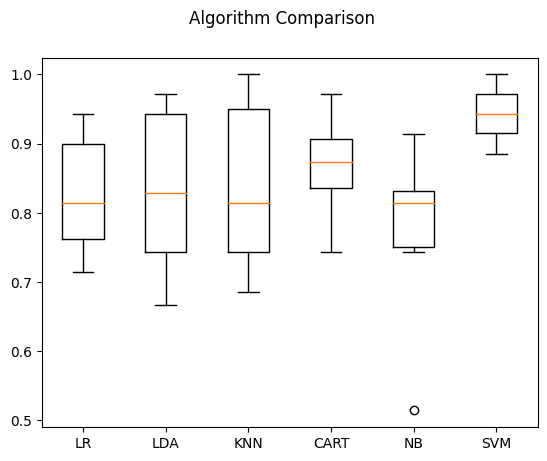

In [63]:
array = df.values
X = array[:,0:33]
Y = array[:,33]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [73]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.842857 (0.069985)
ScaledLDA: 0.853571 (0.062780)
ScaledKNN: 0.832143 (0.084591)
ScaledCART: 0.864286 (0.044607)
ScaledNB: 0.821429 (0.067763)
ScaledSVM: 0.939286 (0.053093)


## Tuned Without Scaler Support vector machine(SVM)

In [75]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()

kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.939286 using {'C': 1.7, 'kernel': 'rbf'}
0.850000 (0.052489) with: {'C': 0.1, 'kernel': 'linear'}
0.671429 (0.098198) with: {'C': 0.1, 'kernel': 'poly'}
0.910714 (0.062372) with: {'C': 0.1, 'kernel': 'rbf'}
0.789286 (0.075677) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.832143 (0.053093) with: {'C': 0.3, 'kernel': 'linear'}
0.857143 (0.063888) with: {'C': 0.3, 'kernel': 'poly'}
0.935714 (0.054865) with: {'C': 0.3, 'kernel': 'rbf'}
0.828571 (0.069253) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.825000 (0.060714) with: {'C': 0.5, 'kernel': 'linear'}
0.864286 (0.067386) with: {'C': 0.5, 'kernel': 'poly'}
0.932143 (0.049099) with: {'C': 0.5, 'kernel': 'rbf'}
0.835714 (0.064286) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.821429 (0.078246) with: {'C': 0.7, 'kernel': 'linear'}
0.871429 (0.071785) with: {'C': 0.7, 'kernel': 'poly'}
0.935714 (0.052489) with: {'C': 0.7, 'kernel': 'rbf'}
0.825000 (0.051632) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.828571 (0.076265) with: {'C': 0.9, 'kernel': 'linear'

In [74]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()

kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.942857 using {'C': 2.0, 'kernel': 'rbf'}
0.817857 (0.064780) with: {'C': 0.1, 'kernel': 'linear'}
0.653571 (0.075000) with: {'C': 0.1, 'kernel': 'poly'}
0.921429 (0.059333) with: {'C': 0.1, 'kernel': 'rbf'}
0.832143 (0.048049) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.828571 (0.079539) with: {'C': 0.3, 'kernel': 'linear'}
0.689286 (0.071518) with: {'C': 0.3, 'kernel': 'poly'}
0.939286 (0.055443) with: {'C': 0.3, 'kernel': 'rbf'}
0.832143 (0.053093) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.839286 (0.084892) with: {'C': 0.5, 'kernel': 'linear'}
0.696429 (0.075339) with: {'C': 0.5, 'kernel': 'poly'}
0.939286 (0.048049) with: {'C': 0.5, 'kernel': 'rbf'}
0.814286 (0.052489) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.832143 (0.087555) with: {'C': 0.7, 'kernel': 'linear'}
0.703571 (0.079939) with: {'C': 0.7, 'kernel': 'poly'}
0.935714 (0.052489) with: {'C': 0.7, 'kernel': 'rbf'}
0.810714 (0.055443) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.835714 (0.084817) with: {'C': 0.9, 'kernel': 'linear'

In [76]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.921429 (0.044607)
GBM: 0.942857 (0.051010)
RF: 0.935714 (0.044607)
ET: 0.935714 (0.041650)


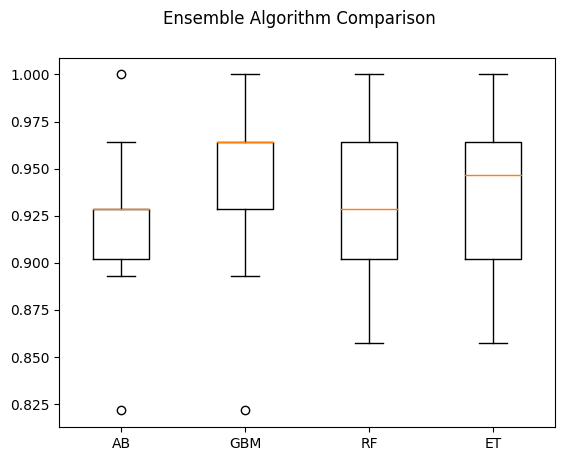

In [78]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Fitting The Model With Standaization

In [108]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0,kernel='rbf')
model.fit(rescaledX, Y_train)

SVC(C=2.0)

In [107]:
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print("Accuracy :", accuracy_score(Y_validation, predictions))

Accuracy : 0.9577464788732394


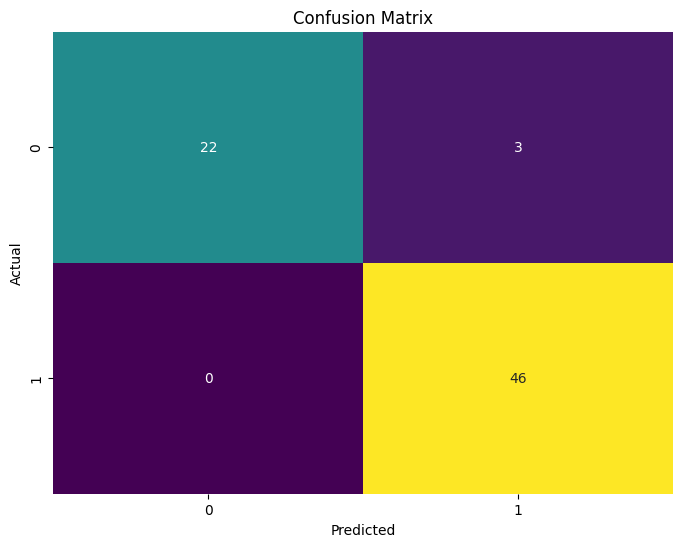

In [81]:
conf_matrix =confusion_matrix(Y_validation, predictions)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [98]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94        25
         1.0       0.94      1.00      0.97        46

    accuracy                           0.96        71
   macro avg       0.97      0.94      0.95        71
weighted avg       0.96      0.96      0.96        71



## Fitting the model Without Standarization


Accuracy : 0.9577464788732394
************************************************************


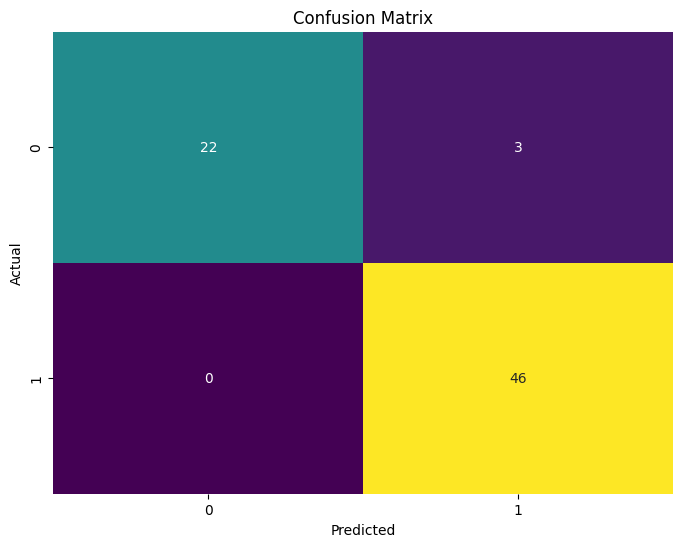

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94        25
         1.0       0.94      1.00      0.97        46

    accuracy                           0.96        71
   macro avg       0.97      0.94      0.95        71
weighted avg       0.96      0.96      0.96        71



In [103]:
# prepare the model
model = SVC(C=1.7,kernel='rbf')
model.fit(X_train, Y_train)

# estimate accuracy on validation dataset
predictions = model.predict(X_validation)

print("Accuracy :", accuracy_score(Y_validation, predictions))

conf_matrix =confusion_matrix(Y_validation, predictions)

print('*'*60)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(Y_validation, predictions))